# Spotify Music Skips Action Prediction
Spotify has over 190 million active users interacting with over 40 million tracks. The goal of the challenge is to predict the likelihood of a user skipping any given song during a listening session.

**Data**:

Orginally data is provided in competition hosted on [crowdai.org](crowdai.org) i.e. later moved to [crowdai.org](aicrowd.com) It contain data description file for you to work with problem on your own.

**Methodology**:
* Loading Data
* Processing Data
* EDA
* Feature Engineering
* Model Selection
* Choosing Model
* Deployment

In [1]:
# Imporing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') # ignore warnings

# Preparing Setup
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# set seaborn style
sns.set_style('whitegrid')

# setting randomness in notebook
np.random.seed(0)

## Data Loading

In [2]:
session_data = pd.read_csv('technocolabs_mini_training_30MB set.xls')

In [3]:
session_data.rename(columns = {'track_id_clean':'track_id'}, inplace = True) 
session_data.dropna(axis=0, inplace=True)
session_data.head()

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1.0,20.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0.0,0.0,0.0,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2.0,20.0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0.0,1.0,0.0,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3.0,20.0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0.0,1.0,0.0,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4.0,20.0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0.0,1.0,0.0,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5.0,20.0,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0.0,1.0,0.0,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone


In [4]:
tf0 = pd.read_csv('tf_00_1GB.csv')
tf1 = pd.read_csv('tf_01_1GB.csv')

track_data = tf0.append(tf1, ignore_index = True) 

In [5]:
track_data.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_2e8f4b71-8a0b-4b9c-b7d8-fb5208e87f9f,326.013336,1971,99.582885,0.716209,0.366495,0.332605,0.439835,5.805774,0.238847,1.010700,6.533861e-01,0,0.769258,-17.094,0.199170,major,0.759699,0.033940,100.370003,4,0.223395,0.146012,-0.706908,0.259496,0.481157,0.238427,-0.098389,-0.254960,-0.227383
1,t_dae2ec0e-ec7b-4b3e-b60c-4a884d0eccb0,147.813324,1963,97.272035,0.839460,0.362212,0.389829,0.507580,6.845427,0.420476,1.000398,3.941550e-09,0,0.085844,-11.295,0.357639,major,0.747436,0.049856,141.334000,4,0.484702,0.039554,-0.539554,0.105141,0.692589,0.226047,-0.468162,0.164389,-0.769024
2,t_cf0164dd-1531-4399-bfa6-dec19cd1fedc,110.400002,1974,99.620384,0.054673,0.495002,0.589378,0.552311,9.361949,0.842938,0.957766,1.041595e-01,0,0.407325,-9.310,0.304721,major,0.493154,0.071753,138.889999,4,0.818441,0.083863,-0.242108,-0.014258,0.096396,0.417641,-0.050576,-0.204757,-0.172563
3,t_0f90acc7-d5c5-4e53-901d-55610fbd090c,237.653336,1988,96.796830,0.042606,0.389634,0.359044,0.585673,6.068578,0.665398,0.947322,1.444963e-05,0,0.251502,-12.159,0.702948,major,0.212197,0.029425,133.139008,4,0.594829,0.192498,0.340039,0.034846,-0.389794,0.518381,0.185008,-0.079907,-0.016978
4,t_36b9ad02-095a-443d-a697-6c7285d9410a,174.600006,1987,97.905891,0.249982,0.513640,0.485435,0.635095,7.198735,0.408715,1.014063,5.266880e-01,0,0.218370,-13.813,0.888889,major,0.193438,0.032178,152.212006,4,0.591289,0.270586,-0.411061,0.165898,0.225652,0.335518,-0.036643,-0.016300,-0.446870


In [6]:
session_data.info(), print('='*100), track_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   session_id                       167880 non-null  object 
 1   session_position                 167880 non-null  float64
 2   session_length                   167880 non-null  float64
 3   track_id                         167880 non-null  object 
 4   skip_1                           167880 non-null  object 
 5   skip_2                           167880 non-null  object 
 6   skip_3                           167880 non-null  object 
 7   not_skipped                      167880 non-null  object 
 8   context_switch                   167880 non-null  float64
 9   no_pause_before_play             167880 non-null  float64
 10  short_pause_before_play          167880 non-null  float64
 11  long_pause_before_play           167880 non-null  float64
 12  hi

(None, None, None)

In [7]:
# Merging session_data & track_data into single dataframe.
session_track_data = pd.merge(session_data, track_data, on='track_id', how='left')

In [8]:
session_track_data.head(3)

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1.0,20.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0.0,0.0,0.0,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2.0,20.0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0.0,1.0,0.0,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,minor,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3.0,20.0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0.0,1.0,0.0,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone,231.266663,2018,99.999976,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10,0.135776,-5.843,0.774327,major,0.296923,0.045354,145.028000,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604


In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(session_track_data, test_size = 0.2, random_state = 69)

train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [10]:
train.shape, test.shape

((134304, 50), (33576, 50))

In [11]:
train.head(3)

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_053ec7fb-dc2e-4cb8-9f2c-8f6407e27785,8.0,20.0,t_05b19d9f-5ac1-4616-a45a-c38610eecad7,True,True,True,False,0.0,1.0,0.0,0.0,0.0,0.0,False,12.0,7/15/2018,True,user_collection,fwdbtn,fwdbtn,258.426666,2017,99.972313,0.012165,0.570798,0.646214,0.720028,9.892393,0.423705,1.076009,0.012649,2,0.453135,-11.964,0.593695,major,0.287430,0.387459,150.009995,4,0.228240,-0.812642,0.268021,0.187215,0.142019,-0.276162,-0.041993,-0.469692,0.147373
1,0_0ac1d286-5abe-4c5e-9ccb-2b9c20cd3cfe,1.0,19.0,t_6d1b9747-6bb2-4d8d-a3b9-7e9ed3a35197,False,False,False,True,0.0,0.0,0.0,0.0,0.0,1.0,False,21.0,7/14/2018,True,catalog,trackdone,trackdone,187.234741,2018,99.993007,0.031756,0.631215,0.701677,0.803029,10.614450,0.718768,1.000216,0.000029,4,0.074207,-3.354,0.960000,major,0.036114,0.047423,145.983002,4,0.607644,-0.454844,0.428459,0.334830,-0.202996,-0.269274,0.156717,-0.193337,0.014985
2,0_010adcab-c78b-4550-b970-a32a9e186e0a,4.0,17.0,t_2dcb53fc-a82a-4255-be6e-8c4642f6aeaf,False,False,False,True,0.0,1.0,0.0,0.0,0.0,0.0,False,13.0,7/15/2018,True,catalog,clickrow,trackdone,226.153824,2016,99.784422,0.024943,0.655545,0.674590,0.805597,9.632603,0.523290,1.018362,0.006978,4,0.110103,-7.623,0.708333,major,0.206992,0.097189,130.074997,4,0.620424,-0.667014,0.304448,0.229578,-0.096206,-0.311503,0.084491,-0.478854,0.250777


In [12]:
test.head(3)

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_0ba0a6c1-634c-4bfb-afca-348c7af76369,11.0,20.0,t_9945581c-aae0-4314-b5fc-1a60ff7057fc,True,True,True,False,0.0,1.0,0.0,0.0,0.0,0.0,False,11.0,7/15/2018,True,radio,fwdbtn,fwdbtn,213.863037,2016,99.998836,0.240305,0.577191,0.584355,0.743055,8.494813,0.571111,1.005845,1.425320e-09,7,0.290736,-6.054,0.591398,minor,0.335188,0.145328,119.054001,4,0.495126,-0.786412,0.320798,0.278044,0.082672,-0.307986,0.048104,-0.319081,0.260407
1,0_0cdc24ea-ada6-464e-8204-a19cd1b461ae,13.0,20.0,t_fd05d3ed-abfa-436c-8cf9-8898d20fab5e,True,True,True,False,0.0,1.0,0.0,0.0,0.0,0.0,True,12.0,7/5/2018,True,user_collection,fwdbtn,fwdbtn,202.919998,2009,99.565987,0.421881,0.331663,0.322404,0.508407,5.959865,0.716486,0.981399,5.208643e-07,11,0.136337,-5.132,0.533019,major,0.445003,0.037093,145.985001,4,0.473220,0.061355,0.199787,0.247882,-0.290177,0.272147,0.153230,-0.399714,-0.725049
2,0_074f270e-b39e-475b-896e-6919123c6e6f,6.0,20.0,t_5dda6c94-0ed7-4133-b1ac-e4ed54d2f594,True,True,True,False,0.0,0.0,1.0,1.0,0.0,0.0,False,18.0,7/15/2018,True,editorial_playlist,fwdbtn,fwdbtn,250.786667,2018,99.979213,0.009404,0.530663,0.692805,0.690593,11.585398,0.818827,0.960350,9.666783e-07,6,0.108359,-5.988,0.560317,major,0.310974,0.368541,177.826996,4,0.777148,-0.887819,0.297824,0.248128,0.112724,-0.336308,-0.010269,-0.543832,0.185966


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134304 entries, 0 to 134303
Data columns (total 50 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   session_id                       134304 non-null  object 
 1   session_position                 134304 non-null  float64
 2   session_length                   134304 non-null  float64
 3   track_id                         134304 non-null  object 
 4   skip_1                           134304 non-null  object 
 5   skip_2                           134304 non-null  object 
 6   skip_3                           134304 non-null  object 
 7   not_skipped                      134304 non-null  object 
 8   context_switch                   134304 non-null  float64
 9   no_pause_before_play             134304 non-null  float64
 10  short_pause_before_play          134304 non-null  float64
 11  long_pause_before_play           134304 non-null  float64
 12  hi

# Data Wrangling

In [14]:
# Replacing boolean (True, False) by int32 (1, 0)
train.replace([True, False], [1, 0], inplace=True)

In [15]:
train.head()

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_053ec7fb-dc2e-4cb8-9f2c-8f6407e27785,8.0,20.0,t_05b19d9f-5ac1-4616-a45a-c38610eecad7,1,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0,12.0,7/15/2018,1,user_collection,fwdbtn,fwdbtn,258.426666,2017,99.972313,0.012165,0.570798,0.646214,0.720028,9.892393,0.423705,1.076009,1.264864e-02,2,0.453135,-11.964,0.593695,major,0.287430,0.387459,150.009995,4,0.228240,-0.812642,0.268021,0.187215,0.142019,-0.276162,-0.041993,-0.469692,0.147373
1,0_0ac1d286-5abe-4c5e-9ccb-2b9c20cd3cfe,1.0,19.0,t_6d1b9747-6bb2-4d8d-a3b9-7e9ed3a35197,0,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0,21.0,7/14/2018,1,catalog,trackdone,trackdone,187.234741,2018,99.993007,0.031756,0.631215,0.701677,0.803029,10.614450,0.718768,1.000216,2.881667e-05,4,0.074207,-3.354,0.960000,major,0.036114,0.047423,145.983002,4,0.607644,-0.454844,0.428459,0.334830,-0.202996,-0.269274,0.156717,-0.193337,0.014985
2,0_010adcab-c78b-4550-b970-a32a9e186e0a,4.0,17.0,t_2dcb53fc-a82a-4255-be6e-8c4642f6aeaf,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0,13.0,7/15/2018,1,catalog,clickrow,trackdone,226.153824,2016,99.784422,0.024943,0.655545,0.674590,0.805597,9.632603,0.523290,1.018362,6.977890e-03,4,0.110103,-7.623,0.708333,major,0.206992,0.097189,130.074997,4,0.620424,-0.667014,0.304448,0.229578,-0.096206,-0.311503,0.084491,-0.478854,0.250777
3,0_02c690b2-fff2-447e-a51f-3fc1a89c672b,9.0,20.0,t_c2c86c28-6a6c-4cf0-942f-415955d0807b,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0,22.0,7/14/2018,1,radio,trackdone,trackdone,217.720001,2018,99.964580,0.315699,0.529701,0.557171,0.695174,8.412134,0.679094,1.002546,3.130181e-07,11,0.068044,-6.576,0.517915,major,0.407475,0.065051,95.997002,4,0.789564,-0.418074,0.492387,0.351095,-0.295696,-0.381293,0.202528,-0.131002,0.070651
4,0_03fc5fb1-b2fe-4d76-8f95-dbe9c5cb2d14,6.0,13.0,t_dd032f47-0360-4ce9-b7b5-ba76560a545f,0,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0,23.0,7/14/2018,1,catalog,trackdone,endplay,166.639999,2017,99.963017,0.450988,0.296808,0.299243,0.539957,5.864040,0.675738,0.972013,3.831899e-05,3,0.132242,-5.371,0.642857,major,0.406781,0.042391,140.014008,4,0.377400,-0.072950,0.435176,0.182297,-0.527803,0.034596,0.218771,-0.413899,-0.318302


In [16]:
# adding new skipped column and dropping skip_1, skip_2 and skip_3
train["skipped"] = train["skip_1"]*train["skip_2"]*train["skip_3"]
train.drop(["skip_1", "skip_2", "skip_3", "not_skipped"], axis=1, inplace=True)

In [17]:
train.head(3)

,session_id,session_position,session_length,track_id,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped
0,0_053ec7fb-dc2e-4cb8-9f2c-8f6407e27785,8.0,20.0,t_05b19d9f-5ac1-4616-a45a-c38610eecad7,0.0,1.0,0.0,0.0,0.0,0.0,0,12.0,7/15/2018,1,user_collection,fwdbtn,fwdbtn,258.426666,2017,99.972313,0.012165,0.570798,0.646214,0.720028,9.892393,0.423705,1.076009,0.012649,2,0.453135,-11.964,0.593695,major,0.287430,0.387459,150.009995,4,0.228240,-0.812642,0.268021,0.187215,0.142019,-0.276162,-0.041993,-0.469692,0.147373,1
1,0_0ac1d286-5abe-4c5e-9ccb-2b9c20cd3cfe,1.0,19.0,t_6d1b9747-6bb2-4d8d-a3b9-7e9ed3a35197,0.0,0.0,0.0,0.0,0.0,1.0,0,21.0,7/14/2018,1,catalog,trackdone,trackdone,187.234741,2018,99.993007,0.031756,0.631215,0.701677,0.803029,10.614450,0.718768,1.000216,0.000029,4,0.074207,-3.354,0.960000,major,0.036114,0.047423,145.983002,4,0.607644,-0.454844,0.428459,0.334830,-0.202996,-0.269274,0.156717,-0.193337,0.014985,0
2,0_010adcab-c78b-4550-b970-a32a9e186e0a,4.0,17.0,t_2dcb53fc-a82a-4255-be6e-8c4642f6aeaf,0.0,1.0,0.0,0.0,0.0,0.0,0,13.0,7/15/2018,1,catalog,clickrow,trackdone,226.153824,2016,99.784422,0.024943,0.655545,0.674590,0.805597,9.632603,0.523290,1.018362,0.006978,4,0.110103,-7.623,0.708333,major,0.206992,0.097189,130.074997,4,0.620424,-0.667014,0.304448,0.229578,-0.096206,-0.311503,0.084491,-0.478854,0.250777,0


In [18]:
train['mode'].unique()

array(['major', 'minor'], dtype=object)

In [19]:
# encoding the mode
train['mode'].replace({'major': 1, 'minor': 0 }, inplace=True)

In [20]:
train.head(3)

,session_id,session_position,session_length,track_id,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped
0,0_053ec7fb-dc2e-4cb8-9f2c-8f6407e27785,8.0,20.0,t_05b19d9f-5ac1-4616-a45a-c38610eecad7,0.0,1.0,0.0,0.0,0.0,0.0,0,12.0,7/15/2018,1,user_collection,fwdbtn,fwdbtn,258.426666,2017,99.972313,0.012165,0.570798,0.646214,0.720028,9.892393,0.423705,1.076009,0.012649,2,0.453135,-11.964,0.593695,1,0.287430,0.387459,150.009995,4,0.228240,-0.812642,0.268021,0.187215,0.142019,-0.276162,-0.041993,-0.469692,0.147373,1
1,0_0ac1d286-5abe-4c5e-9ccb-2b9c20cd3cfe,1.0,19.0,t_6d1b9747-6bb2-4d8d-a3b9-7e9ed3a35197,0.0,0.0,0.0,0.0,0.0,1.0,0,21.0,7/14/2018,1,catalog,trackdone,trackdone,187.234741,2018,99.993007,0.031756,0.631215,0.701677,0.803029,10.614450,0.718768,1.000216,0.000029,4,0.074207,-3.354,0.960000,1,0.036114,0.047423,145.983002,4,0.607644,-0.454844,0.428459,0.334830,-0.202996,-0.269274,0.156717,-0.193337,0.014985,0
2,0_010adcab-c78b-4550-b970-a32a9e186e0a,4.0,17.0,t_2dcb53fc-a82a-4255-be6e-8c4642f6aeaf,0.0,1.0,0.0,0.0,0.0,0.0,0,13.0,7/15/2018,1,catalog,clickrow,trackdone,226.153824,2016,99.784422,0.024943,0.655545,0.674590,0.805597,9.632603,0.523290,1.018362,0.006978,4,0.110103,-7.623,0.708333,1,0.206992,0.097189,130.074997,4,0.620424,-0.667014,0.304448,0.229578,-0.096206,-0.311503,0.084491,-0.478854,0.250777,0


In [21]:
# chaning the date to weekday and droping the date column
train["date"] = pd.to_datetime(train["date"])
train['week_day'] = train["date"].dt.dayofweek
train.drop("date", inplace=True, axis=1)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134304 entries, 0 to 134303
Data columns (total 47 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   session_id                       134304 non-null  object 
 1   session_position                 134304 non-null  float64
 2   session_length                   134304 non-null  float64
 3   track_id                         134304 non-null  object 
 4   context_switch                   134304 non-null  float64
 5   no_pause_before_play             134304 non-null  float64
 6   short_pause_before_play          134304 non-null  float64
 7   long_pause_before_play           134304 non-null  float64
 8   hist_user_behavior_n_seekfwd     134304 non-null  float64
 9   hist_user_behavior_n_seekback    134304 non-null  float64
 10  hist_user_behavior_is_shuffle    134304 non-null  int64  
 11  hour_of_day                      134304 non-null  float64
 12  pr

### Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder**

**Ordinal data** --> data are in order --> **LabelEncoder**

In [23]:
# encoding categorical columns
categorical_columns = ['context_type', 'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end']

for col in categorical_columns:
    # merging labels if they are less than threshold (< 0.001)
    counts = train[col].value_counts(normalize=True)
    labels_less_then_threshold = counts[counts < 0.001].index.to_list()
    where_to_replace = train[col].isin(labels_less_then_threshold).copy()
    train.loc[where_to_replace, col] = 'merged'
    print(labels_less_then_threshold)

[]
['playbtn', 'remote', 'trackerror', 'endplay']
['clickrow']


In [24]:
# setting one hot encoding for categorical columns (Nominal Columns)
from sklearn.preprocessing import OneHotEncoder
One_Hot_Encoder = OneHotEncoder()

context_type = pd.DataFrame(One_Hot_Encoder.fit_transform(train[['context_type']]).toarray())
context_type.columns = One_Hot_Encoder.get_feature_names(['context_type'])

hist_user_behavior_reason_start = pd.DataFrame(One_Hot_Encoder.fit_transform(train[['hist_user_behavior_reason_start']]).toarray())
hist_user_behavior_reason_start.columns = One_Hot_Encoder.get_feature_names(['hub_reason_start']) # hub = hist_user_behavior

hist_user_behavior_reason_end = pd.DataFrame(One_Hot_Encoder.fit_transform(train[['hist_user_behavior_reason_end']]).toarray())
hist_user_behavior_reason_end.columns = One_Hot_Encoder.get_feature_names(['hub_reason_end'])  # hub = hist_user_behavior

In [25]:
context_type.head()

,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection
0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


In [26]:
hist_user_behavior_reason_start.head()

,hub_reason_start_appload,hub_reason_start_backbtn,hub_reason_start_clickrow,hub_reason_start_fwdbtn,hub_reason_start_merged,hub_reason_start_trackdone
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
hist_user_behavior_reason_end.head()

,hub_reason_end_backbtn,hub_reason_end_endplay,hub_reason_end_fwdbtn,hub_reason_end_logout,hub_reason_end_merged,hub_reason_end_remote,hub_reason_end_trackdone
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Concatenate dataframe --> session_track_data + context_type + hist_user_behavior_reason_start + hist_user_behavior_reason_end
train = pd.concat([train, context_type, hist_user_behavior_reason_start, hist_user_behavior_reason_end], axis = 1)

In [29]:
train.drop(["context_type", "hist_user_behavior_reason_start", "hist_user_behavior_reason_end"],
                        axis = 1, inplace = True)
train.head()

,session_id,session_position,session_length,track_id,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped,week_day,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hub_reason_start_appload,hub_reason_start_backbtn,hub_reason_start_clickrow,hub_reason_start_fwdbtn,hub_reason_start_merged,hub_reason_start_trackdone,hub_reason_end_backbtn,hub_reason_end_endplay,hub_reason_end_fwdbtn,hub_reason_end_logout,hub_reason_end_merged,hub_reason_end_remote,hub_reason_end_trackdone
0,0_053ec7fb-dc2e-4cb8-9f2c-8f6407e27785,8.0,20.0,t_05b19d9f-5ac1-4616-a45a-c38610eecad7,0.0,1.0,0.0,0.0,0.0,0.0,0,12.0,1,258.426666,2017,99.972313,0.012165,0.570798,0.646214,0.720028,9.892393,0.423705,1.076009,1.264864e-02,2,0.453135,-11.964,0.593695,1,0.287430,0.387459,150.009995,4,0.228240,-0.812642,0.268021,0.187215,0.142019,-0.276162,-0.041993,-0.469692,0.147373,1,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0_0ac1d286-5abe-4c5e-9ccb-2b9c20cd3cfe,1.0,19.0,t_6d1b9747-6bb2-4d8d-a3b9-7e9ed3a35197,0.0,0.0,0.0,0.0,0.0,1.0,0,21.0,1,187.234741,2018,99.993007,0.031756,0.631215,0.701677,0.803029,10.614450,0.718768,1.000216,2.881667e-05,4,0.074207,-3.354,0.960000,1,0.036114,0.047423,145.983002,4,0.607644,-0.454844,0.428459,0.334830,-0.202996,-0.269274,0.156717,-0.193337,0.014985,0,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0_010adcab-c78b-4550-b970-a32a9e186e0a,4.0,17.0,t_2dcb53fc-a82a-4255-be6e-8c4642f6aeaf,0.0,1.0,0.0,0.0,0.0,0.0,0,13.0,1,226.153824,2016,99.784422,0.024943,0.655545,0.674590,0.805597,9.632603,0.523290,1.018362,6.977890e-03,4,0.110103,-7.623,0.708333,1,0.206992,0.097189,130.074997,4,0.620424,-0.667014,0.304448,0.229578,-0.096206,-0.311503,0.084491,-0.478854,0.250777,0,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0_02c690b2-fff2-447e-a51f-3fc1a89c672b,9.0,20.0,t_c2c86c28-6a6c-4cf0-942f-415955d0807b,0.0,1.0,0.0,0.0,0.0,0.0,0,22.0,1,217.720001,2018,99.964580,0.315699,0.529701,0.557171,0.695174,8.412134,0.679094,1.002546,3.130181e-07,11,0.068044,-6.576,0.517915,1,0.407475,0.065051,95.997002,4,0.789564,-0.418074,0.492387,0.351095,-0.295696,-0.381293,0.202528,-0.131002,0.070651,0,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0_03fc5fb1-b2fe-4d76-8f95-dbe9c5cb2d14,6.0,13.0,t_dd032f47-0360-4ce9-b7b5-ba76560a545f,0.0,1.0,0.0,0.0,0.0,0.0,0,23.0,1,166.639999,2017,99.963017,0.450988,0.296808,0.299243,0.539957,5.864040,0.675738,0.972013,3.831899e-05,3,0.132242,-5.371,0.642857,1,0.406781,0.042391,140.014008,4,0.377400,-0.072950,0.435176,0.182297,-0.527803,0.034596,0.218771,-0.413899,-0.318302,0,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Dropping 'track_id' column.
train.drop(["track_id"], axis=1, inplace=True)

In [31]:
# setting index
train['session_position'] = train['session_position'].astype(int) 
train["track_index"] = train["session_position"]
train.set_index(["session_id", "track_index"], inplace=True)
train.sort_index(inplace=True)

In [32]:
train.tail()

session_position  \
session_id                             track_index                     
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 16                         16   
                                       17                         17   
                                       18                         18   
                                       19                         19   
                                       20                         20   

                                                    session_length  \
session_id                             track_index                   
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 16                     20.0   
                                       17                     20.0   
                                       18                     20.0   
                                       19                     20.0   
                                       20                     20.0   

                                                    context_switch  \
session_id                             track_index                   
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 16                      0.0   
                                       17                      0.0   
                                       18                      0.0   
                                       19                      0.0   
                                       20                      0.0   

                                                    no_pause_before_play  \
session_id                             track_index                         
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 16                            1.0   
                                       17                            1.0   
                                       18                            1.0   
                                       19                            1.0   
                                       20                            1.0   

                                                    short_pause_before_play  \
session_id                             track_index                            
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 16                               0.0   
                                       17                               0.0   
                                       18                               0.0   
                                       19                               0.0   
                                       20                               0.0   

                                                    long_pause_before_play  \
session_id                             track_index                           
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 16                              0.0   
                                       17                              0.0   
                                       18                              0.0   
                                       19                              0.0   
                                       20                              0.0   

                                                    hist_user_behavior_n_seekfwd  \
session_id                             track_index                                 
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 16                                    0.0   
                                       17                                    0.0   
                                       18                                    0.0   
                                       19                                    0.0   
                                       20                                    0.0   

                                                    hist_user_behavior_n_seekback  \
session_id                             track_index                                  
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 16                                     0.0   
                                       17                                     0.0   
  

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 134304 entries, ('0_00006f66-33e5-4de7-a324-2d18e439fc1e', 1) to ('0_0eaeef5d-25e9-4429-bd55-af15d3604c9f', 20)
Data columns (total 61 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   session_position                    134304 non-null  int32  
 1   session_length                      134304 non-null  float64
 2   context_switch                      134304 non-null  float64
 3   no_pause_before_play                134304 non-null  float64
 4   short_pause_before_play             134304 non-null  float64
 5   long_pause_before_play              134304 non-null  float64
 6   hist_user_behavior_n_seekfwd        134304 non-null  float64
 7   hist_user_behavior_n_seekback       134304 non-null  float64
 8   hist_user_behavior_is_shuffle       134304 non-null  int64  
 9   hour_of_day                         134304 non-null  float64
 10  premium 

## EDA - Exploratory Data Analysis

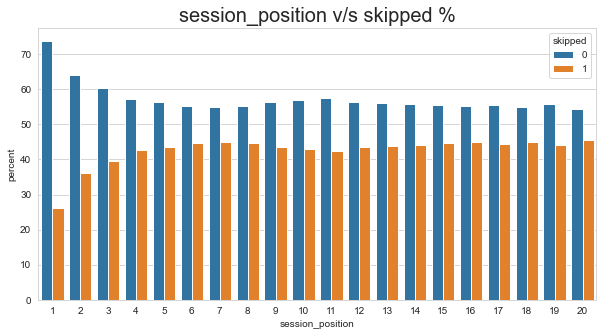

In [34]:
x,y = 'session_position', 'skipped'
plt.figure(figsize=(10, 5))

data=(train
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
#.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')    # alternate of barplot 
)

sns.barplot(x=x, y='percent',hue=y, data=data)
plt.title(x+' v/s '+y+' %', size=20)
plt.show()

Text(0.5, 1.0, 'session_length v/s skipped %')

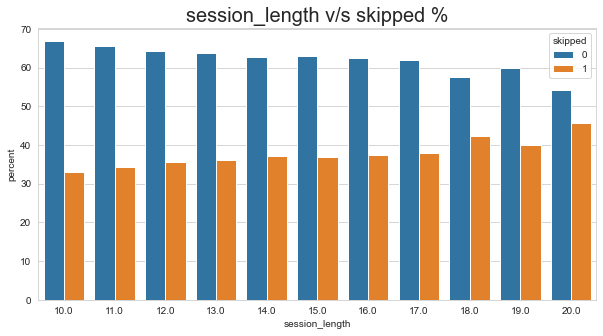

In [35]:
x,y = 'session_length', 'skipped'
plt.figure(figsize=(10, 5))

data=(train
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()  )

sns.barplot(x=x, y='percent',hue=y, data=data)
plt.title(x+' v/s '+y+' %', size=20)

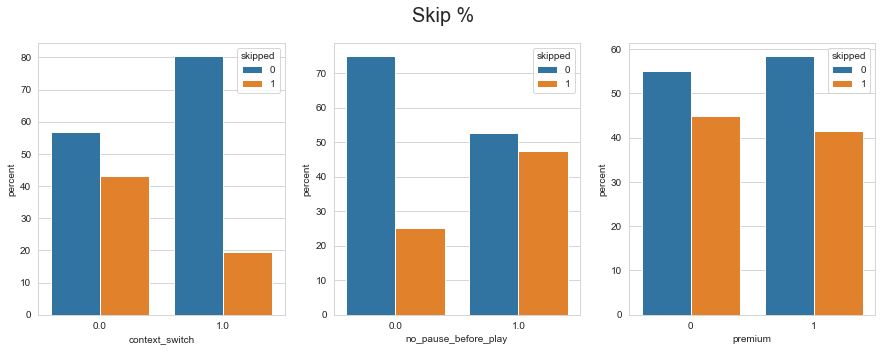

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1, 1]})
fig.suptitle('Skip %', fontsize = 20)

x,y = 'context_switch', 'skipped'
data=(train
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()  )
sns.barplot(ax=axes[0], x=x, y='percent',hue=y, data=data)

x,y = 'no_pause_before_play', 'skipped'
data=(train
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()  )
sns.barplot(ax=axes[1], x=x, y='percent',hue=y, data=data)

x,y = 'premium', 'skipped'
data=(train
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()  )
sns.barplot(ax=axes[2], x=x, y='percent',hue=y, data=data)

plt.show()

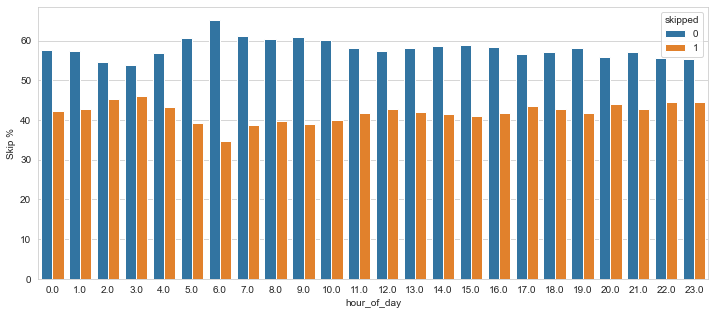

In [37]:
plt.figure(figsize=(12,5))
x,y = 'hour_of_day', 'skipped'
data=(train
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Skip %')
.reset_index()  )
sns.barplot(x=x, y='Skip %',hue=y, data=data)

plt.show()

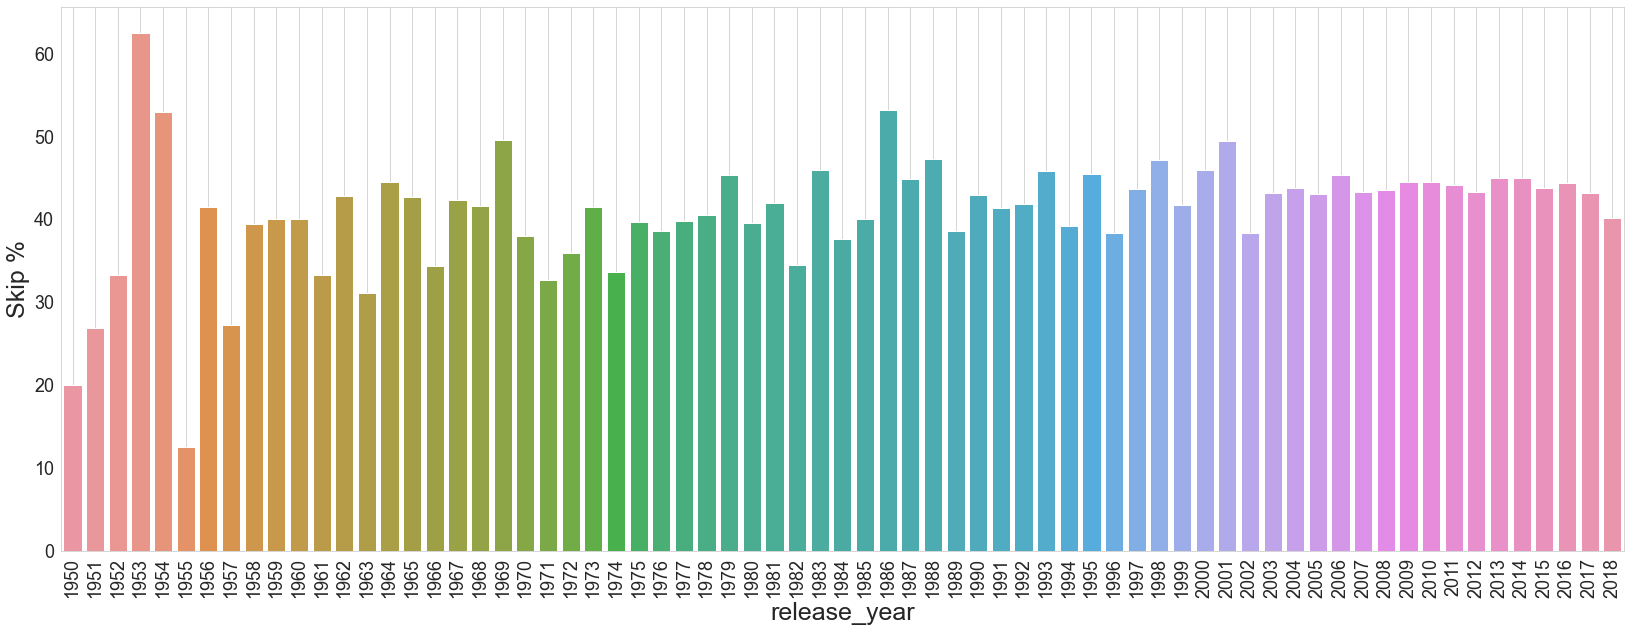

In [38]:
x,y = 'release_year', 'skipped'
plt.figure(figsize=(28, 10))

data=(train
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Skip %')
.reset_index()  )

sns.barplot(x=x, y='Skip %',data=data[data.skipped == 1])
plt.xticks(rotation=90, fontsize=18), plt.yticks(fontsize=18)
plt.xlabel(x, fontsize=25), plt.ylabel('Skip %', fontsize=25)
plt.grid()
plt.show()

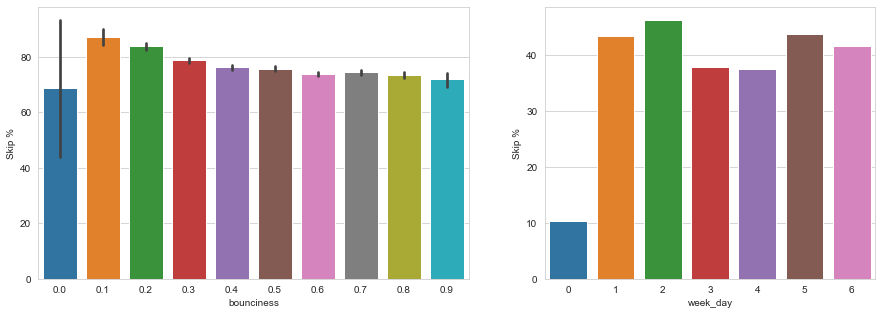

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1.3, 1]})

x,y = 'bounciness', 'skipped'
data=(train
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Skip %')
.reset_index()  )
data.bounciness = data.bounciness.round(1)
sns.barplot(ax=axes[0], x=x, y='Skip %',data=data[data.skipped == 1])

x,y = 'week_day', 'skipped'
data=(train
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Skip %')
.reset_index()  )
sns.barplot(ax=axes[1], x=x, y='Skip %',data=data[data.skipped == 1])

plt.show()

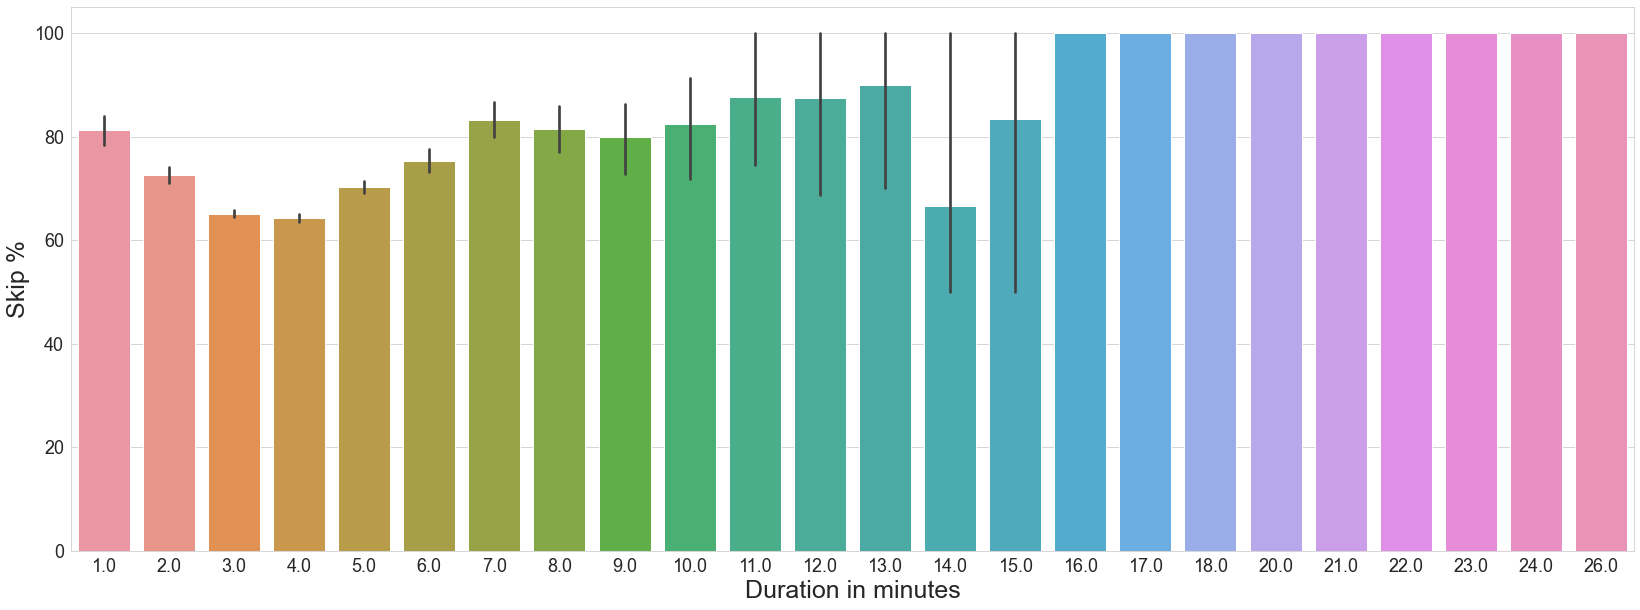

In [40]:
plt.figure(figsize=(28, 10))
x,y = 'duration', 'skipped'
data=(train
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()  )
data.duration = (data.duration / 60).round(0)
sns.barplot(x=x, y='percent',data=data[data.skipped == 1])
plt.xlabel('Duration in minutes', fontsize=25), plt.ylabel('Skip %', fontsize=25)
plt.xticks(fontsize=18), plt.yticks(fontsize=18)
plt.show()

## Featuring Engineering

#### Checking the correlation amoung variables

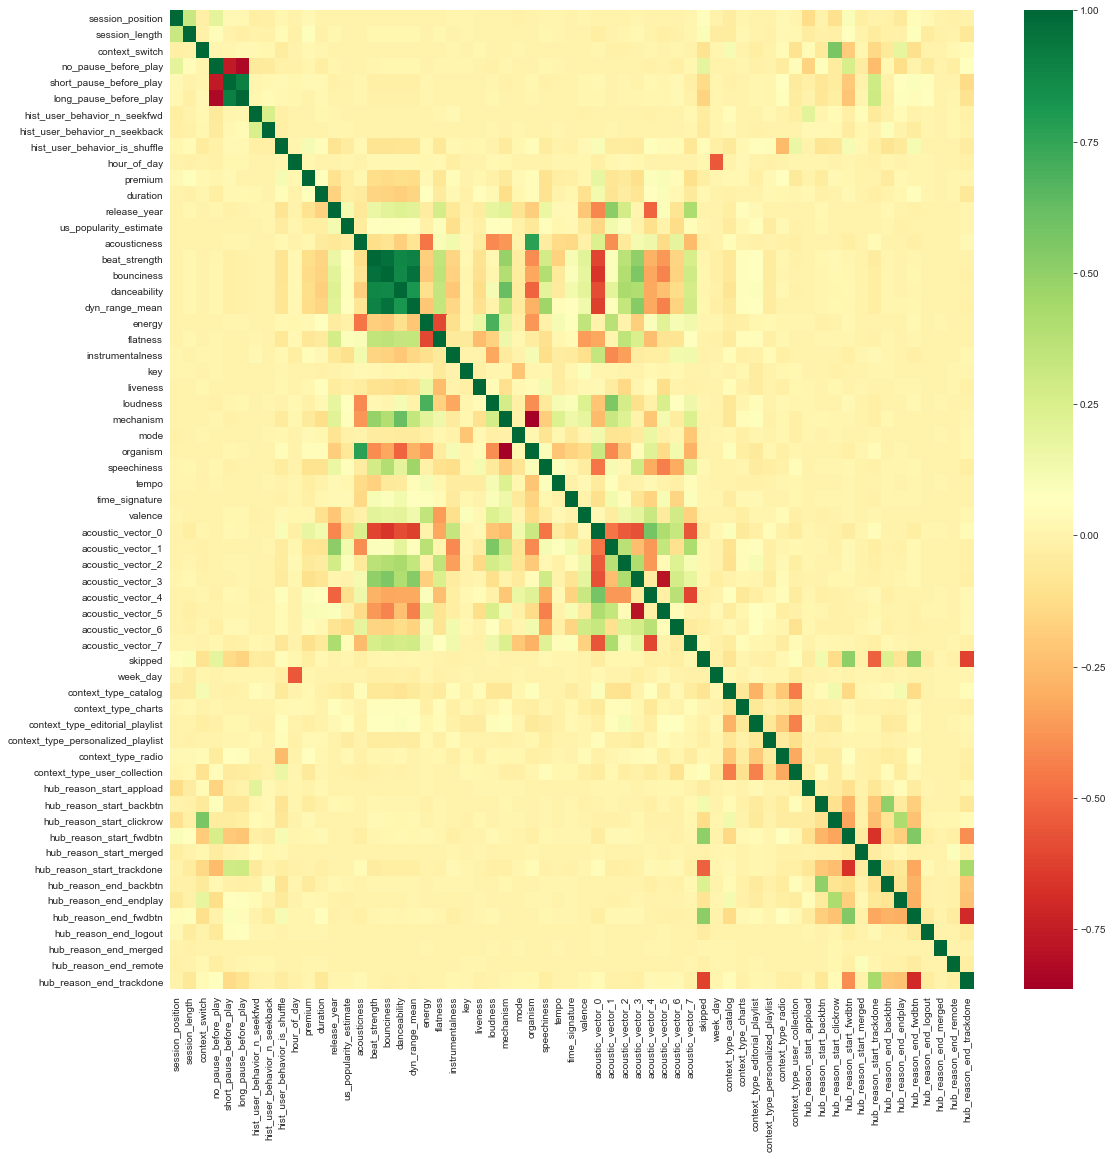

In [41]:
plt.figure(figsize = (18,18))
sns.heatmap(train.corr(), cmap = "RdYlGn")
plt.show()

In above heatmap, there are **2 dark boxes** along the diagonal.<br>
These box represents few variables/features are highly correlated with each other, so we will drop all highly correlated variables except one which is having high correlation with target variable ('skipped').

**1st Dark Box:** 'no_pause_before_play', 'short_pause_before_play', 'long_pause_before_play'

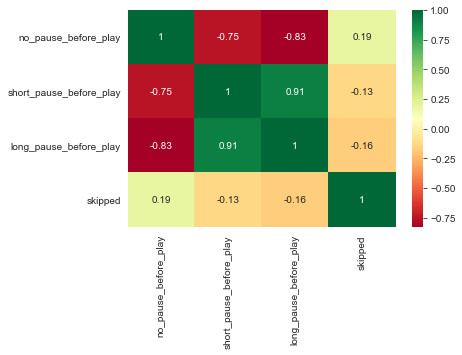

In [42]:
sns.heatmap(train[['no_pause_before_play', 'short_pause_before_play', 
                               'long_pause_before_play', 'skipped']].corr(),annot = True, cmap = "RdYlGn")
plt.show()

In above heatmap, variables 'no_pause_before_play', 'short_pause_before_play', 'long_pause_before_play' are highly correlated with each other.<br>
Among these 3 variables, 'no_pause_before_play' is having highest correlation (0.19) with target variable 'skipped'.<br>
Therefore, will keep 'no_pause_before_play' and drop 'short_pause_before_play', 'long_pause_before_play'.

In [43]:
train.drop(["short_pause_before_play", "long_pause_before_play"], axis=1, inplace=True)

**2nd Dark Box:** 'beat_strength', 'bounciness', 'danceability', 'dyn_range_mean'

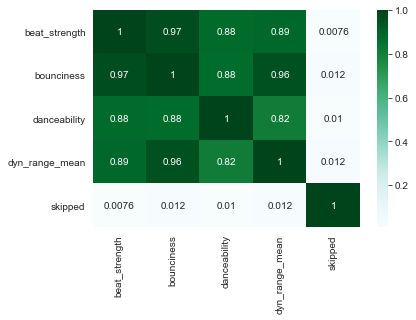

In [44]:
sns.heatmap(train[['beat_strength', 'bounciness', 'danceability', 
                               'dyn_range_mean', 'skipped']].corr(),annot = True, cmap = "BuGn")
plt.show()

In above heatmap, variables 'beat_strength', 'bounciness', 'danceability', 'dyn_range_mean' are highly correlated with each other.<br>
Among these 4 variables, 'bounciness' & 'dyn_range_mean' are having highest correlation (0.012) with target variable 'skipped'.<br>
But 'bounciness' is having sum of correlation with other variables (0.97+0.88+0.96) equals to 2.81 and
'dyn_range_mean' is having sum of correlation with other variables (0.89+0.96+0.82) equals to 2.67.
<br>
Therefore, will keep 'bounciness' and drop 'beat_strength', 'danceability', 'dyn_range_mean'.

In [45]:
train.drop(['beat_strength', 'danceability', 'dyn_range_mean'], axis=1, inplace=True)

In [46]:
train.tail(3)

session_position  \
session_id                             track_index                     
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 18                         18   
                                       19                         19   
                                       20                         20   

                                                    session_length  \
session_id                             track_index                   
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 18                     20.0   
                                       19                     20.0   
                                       20                     20.0   

                                                    context_switch  \
session_id                             track_index                   
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 18                      0.0   
                                       19                      0.0   
                                       20                      0.0   

                                                    no_pause_before_play  \
session_id                             track_index                         
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 18                            1.0   
                                       19                            1.0   
                                       20                            1.0   

                                                    hist_user_behavior_n_seekfwd  \
session_id                             track_index                                 
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 18                                    0.0   
                                       19                                    0.0   
                                       20                                    0.0   

                                                    hist_user_behavior_n_seekback  \
session_id                             track_index                                  
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 18                                     0.0   
                                       19                                     0.0   
                                       20                                     0.0   

                                                    hist_user_behavior_is_shuffle  \
session_id                             track_index                                  
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 18                                       0   
                                       19                                       0   
                                       20                                       0   

                                                    hour_of_day  premium  \
session_id                             track_index                         
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 18                  13.0        1   
                                       19                  13.0        1   
                                       20                  13.0        1   

                                                      duration  release_year  \
session_id                             track_index                             
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 18           204.293335          2018   
                                       19           193.773331          2018   
                                       20           216.853333          2018   

                                                    us_popularity_estimate  \
session_id                             track_index                           
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 18                        99.915604   
                                       19                        99.882031   
                                       20                        99.877843   

                                                    acousticness  bounciness  \
session_id                             track_index                             
0_

#### Scaling

In [47]:
scaling_columns = []
for col in train.columns:
    if (len(train[col].unique()) != 2) :
        scaling_columns.append(col)
print(len(scaling_columns),scaling_columns)

31 ['session_position', 'session_length', 'hist_user_behavior_n_seekfwd', 'hist_user_behavior_n_seekback', 'hour_of_day', 'duration', 'release_year', 'us_popularity_estimate', 'acousticness', 'bounciness', 'energy', 'flatness', 'instrumentalness', 'key', 'liveness', 'loudness', 'mechanism', 'organism', 'speechiness', 'tempo', 'time_signature', 'valence', 'acoustic_vector_0', 'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3', 'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7', 'week_day']


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in scaling_columns:
    train[col] = scaler.fit_transform(np.array(train[col]).reshape(-1, 1))

In [49]:
train.head(5)

session_position  \
session_id                             track_index                     
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                   -1.525891   
                                       2                   -1.342715   
                                       3                   -1.159538   
                                       4                   -0.976361   
                                       5                   -0.793185   

                                                    session_length  \
session_id                             track_index                   
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                  0.687363   
                                       2                  0.687363   
                                       3                  0.687363   
                                       4                  0.687363   
                                       5                  0.687363   

                                                    context_switch  \
session_id                             track_index                   
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                       0.0   
                                       2                       0.0   
                                       3                       0.0   
                                       4                       0.0   
                                       5                       0.0   

                                                    no_pause_before_play  \
session_id                             track_index                         
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                             0.0   
                                       2                             1.0   
                                       3                             1.0   
                                       4                             1.0   
                                       5                             1.0   

                                                    hist_user_behavior_n_seekfwd  \
session_id                             track_index                                 
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                               -0.102245   
                                       2                               -0.102245   
                                       3                               -0.102245   
                                       4                               -0.102245   
                                       5                               -0.102245   

                                                    hist_user_behavior_n_seekback  \
session_id                             track_index                                  
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                                -0.072103   
                                       2                                -0.072103   
                                       3                                -0.072103   
                                       4                                -0.072103   
                                       5                                -0.072103   

                                                    hist_user_behavior_is_shuffle  \
session_id                             track_index                                  
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                                        1   
                                       2                                        1   
                                       3                                        1   
                                       4                                        1   
                                       5                                        1   

                                                    hour_of_day  premium  \
session_id                             track_index                         
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1               0.299569        1   
                       

#### Important feature using ExtraTreesRegressor

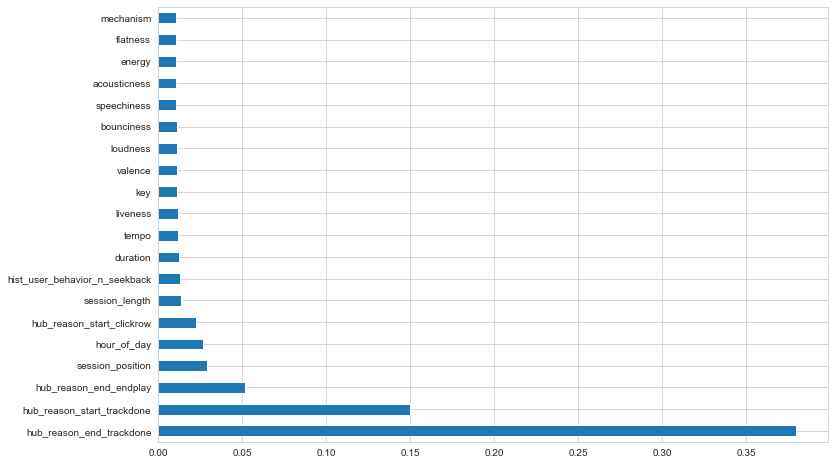

In [50]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()

x_train = train.drop("skipped", axis=1)
y_train = train['skipped']
# Alternate # x_train = session_track_data.loc[:, [col for col in session_track_data.columns if col != 'skipped']]
selection.fit(x_train, y_train)

#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## web_app_scaling_df

Making dataset for Web Application (web_app_scaling_df) and then manually uploading it on cloud for future use in web application.

Why this dataset?
This dataset will be used for scaling of data received through web app form. 
data received through web app form will be merged (as a last row) with this dataframe (web_app_scaling_df), then this merged dataframe will be scaled & then last row of dataframe is separately feed into ML model for prediction.

In [51]:
web_app_scaling_df = test.copy()

# Replacing boolean (True, False) by int32 (1, 0)
web_app_scaling_df.replace([True, False], [1, 0], inplace=True)

# adding new skipped column and dropping skip_1, skip_2 and skip_3
web_app_scaling_df["skipped"] = web_app_scaling_df["skip_1"]*web_app_scaling_df["skip_2"]*web_app_scaling_df["skip_3"]
web_app_scaling_df.drop(["skip_1", "skip_2", "skip_3", "not_skipped"], axis=1, inplace=True)

# encoding the mode
web_app_scaling_df['mode'].replace({'major': 1, 'minor': 0 }, inplace=True)

# chaning the date to weekday and droping the date column
web_app_scaling_df["date"] = pd.to_datetime(web_app_scaling_df["date"])
web_app_scaling_df['week_day'] = web_app_scaling_df["date"].dt.dayofweek
web_app_scaling_df.drop("date", inplace=True, axis=1)

# encoding categorical columns
categorical_columns = ['context_type', 'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end']

for col in categorical_columns:
    # merging labels if they are less than threshold (< 0.001)
    counts = web_app_scaling_df[col].value_counts(normalize=True)
    labels_less_then_threshold = counts[counts < 0.001].index.to_list()
    where_to_replace = web_app_scaling_df[col].isin(labels_less_then_threshold).copy()
    web_app_scaling_df.loc[where_to_replace, col] = 'merged'

# setting one hot encoding for categorical columns (Nominal Columns)
from sklearn.preprocessing import OneHotEncoder
One_Hot_Encoder = OneHotEncoder()
context_type = pd.DataFrame(One_Hot_Encoder.fit_transform(web_app_scaling_df[['context_type']]).toarray())
context_type.columns = One_Hot_Encoder.get_feature_names(['context_type'])
hist_user_behavior_reason_start = pd.DataFrame(One_Hot_Encoder.fit_transform(web_app_scaling_df[['hist_user_behavior_reason_start']]).toarray())
hist_user_behavior_reason_start.columns = One_Hot_Encoder.get_feature_names(['hub_reason_start']) # hub = hist_user_behavior
hist_user_behavior_reason_end = pd.DataFrame(One_Hot_Encoder.fit_transform(web_app_scaling_df[['hist_user_behavior_reason_end']]).toarray())
hist_user_behavior_reason_end.columns = One_Hot_Encoder.get_feature_names(['hub_reason_end'])  # hub = hist_user_behavior

# Concatenate dataframe --> session_track_data + context_type + hist_user_behavior_reason_start + hist_user_behavior_reason_end
web_app_scaling_df = pd.concat([web_app_scaling_df, context_type, hist_user_behavior_reason_start, hist_user_behavior_reason_end], axis = 1)
web_app_scaling_df.drop(["context_type", "hist_user_behavior_reason_start", "hist_user_behavior_reason_end", "track_id"],
                        axis = 1, inplace = True)

# drop all highly correlated variables.
web_app_scaling_df.drop(["short_pause_before_play", "long_pause_before_play"], axis=1, inplace=True)
web_app_scaling_df.drop(['beat_strength', 'danceability', 'dyn_range_mean'], axis=1, inplace=True)

web_app_scaling_df.drop(["session_id"], axis=1, inplace=True)
web_app_scaling_df.drop("skipped", axis=1, inplace=True)
web_app_scaling_df.drop(['hub_reason_start_playbtn'], axis=1, inplace=True)
web_app_scaling_df = web_app_scaling_df[x_train.columns.tolist()]

In [52]:
web_app_scaling_df.head()

,session_position,session_length,context_switch,no_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,duration,release_year,us_popularity_estimate,acousticness,bounciness,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,week_day,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hub_reason_start_appload,hub_reason_start_backbtn,hub_reason_start_clickrow,hub_reason_start_fwdbtn,hub_reason_start_merged,hub_reason_start_trackdone,hub_reason_end_backbtn,hub_reason_end_endplay,hub_reason_end_fwdbtn,hub_reason_end_logout,hub_reason_end_merged,hub_reason_end_remote,hub_reason_end_trackdone
0,11.0,20.0,0.0,1.0,0.0,0.0,0,11.0,1,213.863037,2016,99.998836,0.240305,0.584355,0.571111,1.005845,1.425320e-09,7,0.290736,-6.054,0.591398,0,0.335188,0.145328,119.054001,4,0.495126,-0.786412,0.320798,0.278044,0.082672,-0.307986,0.048104,-0.319081,0.260407,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,13.0,20.0,0.0,1.0,0.0,0.0,1,12.0,1,202.919998,2009,99.565987,0.421881,0.322404,0.716486,0.981399,5.208643e-07,11,0.136337,-5.132,0.533019,1,0.445003,0.037093,145.985001,4,0.473220,0.061355,0.199787,0.247882,-0.290177,0.272147,0.153230,-0.399714,-0.725049,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,6.0,20.0,0.0,0.0,0.0,0.0,0,18.0,1,250.786667,2018,99.979213,0.009404,0.692805,0.818827,0.960350,9.666783e-07,6,0.108359,-5.988,0.560317,1,0.310974,0.368541,177.826996,4,0.777148,-0.887819,0.297824,0.248128,0.112724,-0.336308,-0.010269,-0.543832,0.185966,6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,11.0,11.0,0.0,1.0,0.0,0.0,0,9.0,1,220.399994,1965,99.992507,0.011449,0.486896,0.730058,0.939399,1.032961e-05,5,0.075368,-10.613,0.516616,1,0.341900,0.042968,108.705002,4,0.894005,0.135144,-0.000290,-0.095482,-0.259421,0.629192,0.098299,-0.322766,-0.199248,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,17.0,20.0,0.0,1.0,0.0,0.0,1,14.0,1,176.746674,2017,99.991820,0.519680,0.569867,0.677484,1.006050,1.358047e-08,7,0.133498,-5.121,0.510638,1,0.504748,0.082367,127.067001,4,0.882087,-0.612464,0.324233,0.378420,0.036651,-0.158929,0.204886,-0.017173,0.124651,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [53]:
print('x_train Shape: ', x_train.shape)
print('web_app_scaling_df Shape: ', web_app_scaling_df.shape)

x_train Shape:  (134304, 55)
web_app_scaling_df Shape:  (33576, 55)


In [54]:
web_app_scaling_df.to_csv('web_app_scaling_df.csv')

## Preprocessing of Testing Dataset

In [55]:
### Preprocessing Testing Data seperately to avoid DATA LEAKAGE.
# Replacing boolean (True, False) by int32 (1, 0)
test.replace([True, False], [1, 0], inplace=True)

# adding new skipped column and dropping skip_1, skip_2 and skip_3
test["skipped"] = test["skip_1"]*test["skip_2"]*test["skip_3"]
test.drop(["skip_1", "skip_2", "skip_3", "not_skipped"], axis=1, inplace=True)

# encoding the mode
test['mode'].replace({'major': 1, 'minor': 0 }, inplace=True)

# chaning the date to weekday and droping the date column
test["date"] = pd.to_datetime(test["date"])
test['week_day'] = test["date"].dt.dayofweek
test.drop("date", inplace=True, axis=1)

# encoding categorical columns
categorical_columns = ['context_type', 'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end']

for col in categorical_columns:
    # merging labels if they are less than threshold (< 0.001)
    counts = test[col].value_counts(normalize=True)
    labels_less_then_threshold = counts[counts < 0.001].index.to_list()
    where_to_replace = test[col].isin(labels_less_then_threshold).copy()
    test.loc[where_to_replace, col] = 'merged'

# setting one hot encoding for categorical columns (Nominal Columns)
from sklearn.preprocessing import OneHotEncoder
One_Hot_Encoder = OneHotEncoder()
context_type = pd.DataFrame(One_Hot_Encoder.fit_transform(test[['context_type']]).toarray())
context_type.columns = One_Hot_Encoder.get_feature_names(['context_type'])
hist_user_behavior_reason_start = pd.DataFrame(One_Hot_Encoder.fit_transform(test[['hist_user_behavior_reason_start']]).toarray())
hist_user_behavior_reason_start.columns = One_Hot_Encoder.get_feature_names(['hub_reason_start']) # hub = hist_user_behavior
hist_user_behavior_reason_end = pd.DataFrame(One_Hot_Encoder.fit_transform(test[['hist_user_behavior_reason_end']]).toarray())
hist_user_behavior_reason_end.columns = One_Hot_Encoder.get_feature_names(['hub_reason_end'])  # hub = hist_user_behavior

# Concatenate dataframe --> session_track_data + context_type + hist_user_behavior_reason_start + hist_user_behavior_reason_end
test = pd.concat([test, context_type, hist_user_behavior_reason_start, hist_user_behavior_reason_end], axis = 1)
test.drop(["context_type", "hist_user_behavior_reason_start", "hist_user_behavior_reason_end", "track_id"],
                        axis = 1, inplace = True)

# setting index
test['session_position'] = test['session_position'].astype(int) 
test["track_index"] = test["session_position"]
test.set_index(["session_id", "track_index"], inplace=True)
test.sort_index(inplace=True)

# drop all highly correlated variables.
test.drop(["short_pause_before_play", "long_pause_before_play"], axis=1, inplace=True)
test.drop(['beat_strength', 'danceability', 'dyn_range_mean'], axis=1, inplace=True)

# Scaling
scaling_columns = []
for col in test.columns:
    if (len(test[col].unique()) != 2) :
        scaling_columns.append(col)
for col in scaling_columns:
    test[col] = scaler.fit_transform(np.array(test[col]).reshape(-1, 1))

x_test = test.drop("skipped", axis=1)
y_test = test['skipped']

In [56]:
print('x_train Shape: ', x_train.shape)  
print('x_test Shape: ', x_test.shape)

x_train Shape:  (134304, 55)
x_test Shape:  (33576, 56)


In [57]:
# Columns which are in x_train but not in x_test, due to OneHotEncoding.
x_train_columns = x_train.columns.tolist()
x_test_columns = x_test.columns.tolist()

for col_name in x_train_columns:
    if (col_name not in x_test_columns):
        print(col_name)

In [58]:
# Columns which are in x_test but not in x_train, due to OneHotEncoding.
for col_name in x_test_columns:
    if (col_name not in x_train_columns):
        print(col_name)

hub_reason_start_playbtn


In [59]:
test[['hub_reason_start_playbtn', 'skipped']].corr()

,hub_reason_start_playbtn,skipped
hub_reason_start_playbtn,1.000000,-0.005484
skipped,-0.005484,1.000000


In [60]:
x_test.drop(['hub_reason_start_playbtn'], axis=1, inplace=True)

In [61]:
print('x_train Shape: ', x_train.shape) 
print('x_test Shape: ', x_test.shape)

x_train Shape:  (134304, 55)
x_test Shape:  (33576, 55)


In [62]:
# arranging x_test columns in sequence of x_train columns.
x_test = x_test[x_train_columns]
x_test.head()

session_position  \
session_id                             track_index                     
0_00006f66-33e5-4de7-a324-2d18e439fc1e 15                   1.044001   
0_0000a72b-09ac-412f-b452-9b9e79bded8f 3                   -1.157337   
                                       4                   -0.973892   
                                       7                   -0.423558   
                                       10                   0.126777   

                                                    session_length  \
session_id                             track_index                   
0_00006f66-33e5-4de7-a324-2d18e439fc1e 15                 0.681543   
0_0000a72b-09ac-412f-b452-9b9e79bded8f 3                  0.681543   
                                       4                  0.681543   
                                       7                  0.681543   
                                       10                 0.681543   

                                                    context_switch  \
session_id                             track_index                   
0_00006f66-33e5-4de7-a324-2d18e439fc1e 15                      0.0   
0_0000a72b-09ac-412f-b452-9b9e79bded8f 3                       0.0   
                                       4                       0.0   
                                       7                       0.0   
                                       10                      0.0   

                                                    no_pause_before_play  \
session_id                             track_index                         
0_00006f66-33e5-4de7-a324-2d18e439fc1e 15                            1.0   
0_0000a72b-09ac-412f-b452-9b9e79bded8f 3                             1.0   
                                       4                             1.0   
                                       7                             1.0   
                                       10                            1.0   

                                                    hist_user_behavior_n_seekfwd  \
session_id                             track_index                                 
0_00006f66-33e5-4de7-a324-2d18e439fc1e 15                              -0.122198   
0_0000a72b-09ac-412f-b452-9b9e79bded8f 3                               -0.122198   
                                       4                               -0.122198   
                                       7                               -0.122198   
                                       10                              -0.122198   

                                                    hist_user_behavior_n_seekback  \
session_id                             track_index                                  
0_00006f66-33e5-4de7-a324-2d18e439fc1e 15                               -0.104834   
0_0000a72b-09ac-412f-b452-9b9e79bded8f 3                                -0.104834   
                                       4                                -0.104834   
                                       7                                -0.104834   
                                       10                               -0.104834   

                                                    hist_user_behavior_is_shuffle  \
session_id                             track_index                                  
0_00006f66-33e5-4de7-a324-2d18e439fc1e 15                                       1   
0_0000a72b-09ac-412f-b452-9b9e79bded8f 3                                        1   
                                       4                                        1   
                                       7                                        1   
                                       10                                       1   

                                                    hour_of_day  premium  \
session_id                             track_index                         
0_00006f66-33e5-4de7-a324-2d18e439fc1e 15              0.308389        1   
0_0000a72b-09ac-412f-b4

In [63]:
# Columns which are in x_test but not in x_train, due to OneHotEncoding.
x_train_columns = x_train.columns.tolist()
x_test_columns = x_test.columns.tolist()
for col_name in x_test_columns:
    if (col_name not in x_train_columns):
        print(col_name)

## ML Model(s) training & selecting best Model based on f1_score.

In [64]:
from sklearn.ensemble import RandomForestClassifier
! pip install xgboost
from xgboost import XGBClassifier
! pip install lightgbm
import lightgbm as lgbm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV

### RandomForestClassifier

In [65]:
# RandomForestClassifier
RFC = RandomForestClassifier(random_state = 1).fit(x_train, y_train)
pred_RFC = RFC.predict(x_test)
score_RFC = f1_score(y_test, pred_RFC)
print('RandomForestClassifier: ',score_RFC)

RandomForestClassifier:  0.8609551535315728


### XGBClassifier

In [66]:
# XGBClassifier
XGBC = XGBClassifier(random_state = 1).fit(x_train, y_train)
pred_XGBC = XGBC.predict(x_test)
score_XGBC = f1_score(y_test, pred_XGBC)
print('XGBClassifier: ',score_XGBC)

[23:25:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier:  0.8637437108532704


### DecisionTreeClassifier

In [63]:
depth = []
score_DTC = [] 
for i in range(1,21):
    DTC = DecisionTreeClassifier(criterion="entropy", max_depth = i, random_state = 1).fit(x_train, y_train)
    pred_DTC = DTC.predict(x_test) 
    score = f1_score(y_test, pred_DTC)
    depth.append(i)
    score_DTC.append(score)
    
print('We get maximum f1_score {} for DecisionTreeClassifier when max_depth = {}.'.format
      (max(score_DTC), depth[score_DTC.index(max(score_DTC))])  )

We get maximum f1_score 0.8646282281874639 for DecisionTreeClassifier when max_depth = 10.


In [65]:
DTC = DecisionTreeClassifier(criterion="entropy", max_depth = 10, random_state = 1).fit(x_train, y_train)
pred_DTC = DTC.predict(x_test)
score_DTC = f1_score(y_test, pred_DTC)
print('DecisionTreeClassifier: ',score_DTC)

DecisionTreeClassifier:  0.8646282281874639


### KNeighborsClassifier

In [68]:
KNC = KNeighborsClassifier().fit(x_train, y_train)
pred_KNC = KNC.predict(x_test) 
score = f1_score(y_test, pred_DTC)
print('KNeighborsClassifier: ',score)

KNeighborsClassifier:  0.8646282281874639


In [ ]:
n_neighbors = []
score_KNC = []
for i in range(3,10):
    KNC = KNeighborsClassifier(n_neighbors = i).fit(x_train, y_train)
    pred_KNC = KNC.predict(x_test) 
    score = f1_score(y_test, pred_DTC)
    n_neighbors.append(i)
    score_KNC.append(score)
    
print('We get maximum f1_score {} for KNeighborsClassifier when n_neighbors = {}.'.format
      (max(score_KNC), n_neighbors[score_KNC.index(max(score_KNC))])  )

In [66]:
KNC = KNeighborsClassifier(n_neighbors = 3).fit(x_train, y_train)
pred_KNC = KNC.predict(x_test) 
score = f1_score(y_test, pred_DTC)
print('KNeighborsClassifier: ',score)

KNeighborsClassifier:  0.8646282281874639


### LogisticRegression

In [68]:
# LogisticRegression
LogReg = LogisticRegression().fit(x_train, y_train)
pred_LogReg = LogReg.predict(x_test)
score_LogReg = f1_score(y_test, pred_LogReg)
print('LogisticRegression: ',score_LogReg)

LogisticRegression:  0.8539295575459627


### Support Vector Machine

In [69]:
# LogisticRegression
SVM = svm.SVC().fit(x_train, y_train)
pred_SVM = SVM.predict(x_test)
score_SVM = f1_score(y_test, pred_SVM)
print('LogisticRegression: ',score_SVM)

LogisticRegression:  0.8591495427836306


In [70]:
# LogisticRegression
SVM = svm.SVC(kernel='rbf').fit(x_train, y_train)
pred_SVM = SVM.predict(x_test)
score_SVM = f1_score(y_test, pred_SVM)
print('LogisticRegression: ',score_SVM)

LogisticRegression:  0.8591495427836306


## Selecting DecisionTreeClassifier as a final Model & saving it as a Pickel file for deployment on web app.

In [67]:
import pickle
model_pkl_filename = 'model.pkl'
model_pkl = open(model_pkl_filename, 'wb')
pickle.dump(DTC, model_pkl)
model_pkl.close()